In [1]:
pip install torch torchvision matplotlib


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transform, download=True
)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)


In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [11]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [12]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/5], Loss: 0.1671
Epoch [2/5], Loss: 0.0460
Epoch [3/5], Loss: 0.0324
Epoch [4/5], Loss: 0.0232
Epoch [5/5], Loss: 0.0190


In [13]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")



Test Accuracy: 99.04%


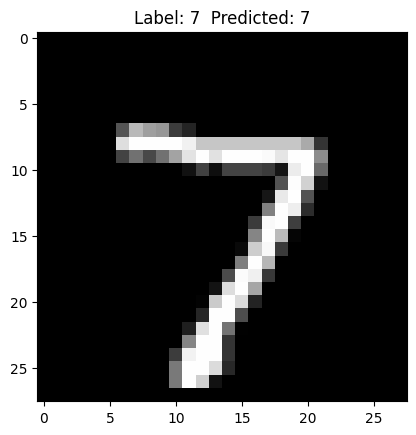

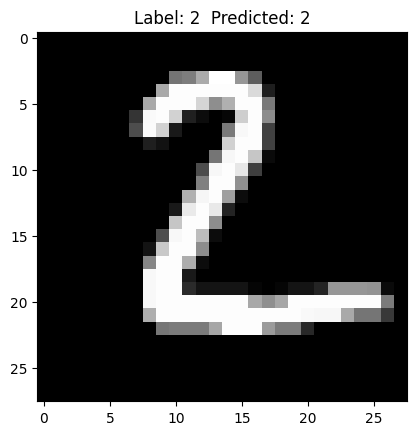

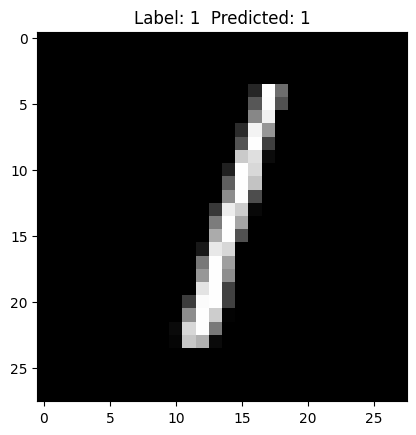

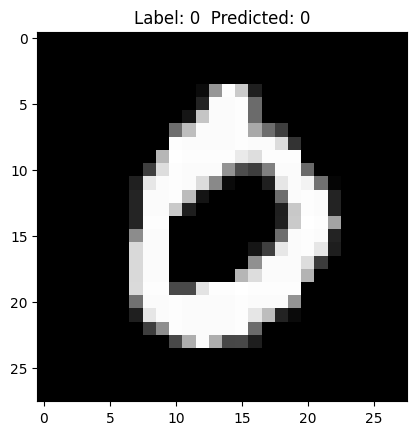

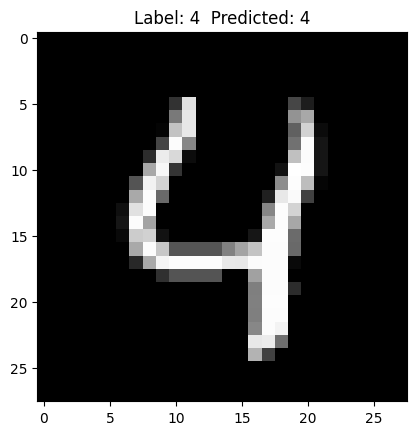

In [14]:
import numpy as np

dataiter = iter(test_loader)
images, labels = next(dataiter)

outputs = model(images)
_, preds = torch.max(outputs, 1)

for i in range(5):
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"Label: {labels[i].item()}  Predicted: {preds[i].item()}")
    plt.show()


In [15]:
import os
print(os.listdir("./"))

['.config', 'data', 'sample_data']


In [16]:
torch.save(model.state_dict(), "mnist_cnn.pth")

print("✅ Model saved as mnist_cnn.pth")

✅ Model saved as mnist_cnn.pth


In [19]:
from google.colab import files
files.download('mnist_cnn.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>